In [15]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('/Users/macbook/Downloads/myopia.csv')
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [17]:
myopic = df['MYOPIC']
myopic.value_counts().nunique()

2

In [18]:
drop = df.drop(columns = ['MYOPIC'])
drop

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

In [21]:
scaled

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         9.87137728e-01,  1.00324150e+00,  2.57480672e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
         9.87137728e-01,  1.00324150e+00, -3.88378667e-01],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -1.01302987e+00, -9.96768974e-01, -3.88378667e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
         9.87137728e-01,  1.00324150e+00, -3.88378667e-01],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.01302987e+00, -9.96768974e-01, -3.88378667e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
         9.87137728e-01,  1.00324150e+00, -3.88378667e-01]])

In [22]:
pca = PCA(n_components = 0.90)
pca2 = pca.fit_transform(scaled)

In [23]:
tsne = TSNE(learning_rate = 250)
tsne_features = tsne.fit_transform(pca2)

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [24]:
tsne_features.shape

(618, 2)

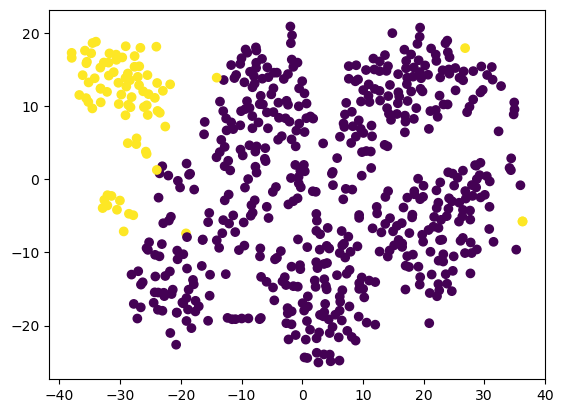

In [25]:
plt.scatter(tsne_features[:,0],tsne_features[:,1], c = myopic)

In [26]:
pip install threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [29]:
inertia = []
k = list(range(2,10))

for i in k:
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(pca2)
    inertia.append(km.inertia_)

In [30]:
elbow = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow)
df_elbow

,k,inertia
0,2,7453.292155
1,3,6686.361671
2,4,6206.151491
3,5,5888.248458
4,6,5634.895952
5,7,5401.214518
6,8,5211.020022
7,9,5079.720624


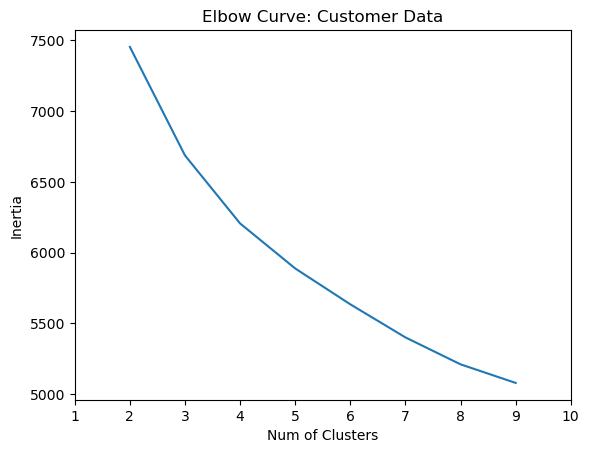

In [31]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Num of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve: Customer Data')
plt.show()

In [35]:
columns = []
for i in range(len(pca.components_)):
    columns.append(i+1)
df_pca = pd.DataFrame(pca2, columns = columns)
df_pca['class'] = km.labels_
df_pca

,1,2,3,4,5,6,7,8,9,10,11,class
0,0.782270,0.899383,-2.697392,0.533307,-3.138869,-1.514275,2.665827,-0.685834,1.259007,0.256176,1.837348,2
1,-0.618300,-1.586214,-0.635506,-0.310405,0.562274,0.589375,0.675577,0.329263,-0.816743,0.683726,-0.386646,7
2,-0.986590,-0.653197,1.410335,0.671055,-0.100877,0.014845,-0.535527,0.124015,0.826729,-0.091503,0.370604,5
3,0.351714,0.943830,-2.517241,-1.389667,-2.240394,0.125941,0.395271,-1.507727,1.722338,0.097634,-0.416667,2
4,-0.401488,-2.792502,0.639103,0.680018,0.235568,-0.868260,0.320928,-1.447538,-0.335757,-0.383506,0.317567,0
...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.001405,0.907642,-2.346239,1.062685,2.246584,-0.473569,-0.800659,0.711374,0.809448,-0.921241,0.264993,4
614,-0.646011,-1.797854,-0.397228,0.149875,0.326612,0.521456,0.377034,0.183911,-0.943828,0.891717,-0.006020,0
615,-0.913375,-2.262451,0.699241,-0.267697,0.334606,0.713550,0.702710,-0.357955,-1.385478,0.818801,0.197022,0
616,-1.161025,0.466183,0.336590,0.620981,-0.279144,-0.516132,0.001183,0.536952,1.530951,0.018101,-1.091853,5


In [36]:
def show_clusters(df):
    plt.scatter(df[1], df[2], c = df['class'])
    plt.xlabel('1')
    plt.ylabel('2')
    plt.show()

In [37]:
model = KMeans(n_clusters = 4, random_state = 0)

model.fit(df_pca)

predictions = model.predict(df_pca)

df_pca['class'] = model.lables_

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

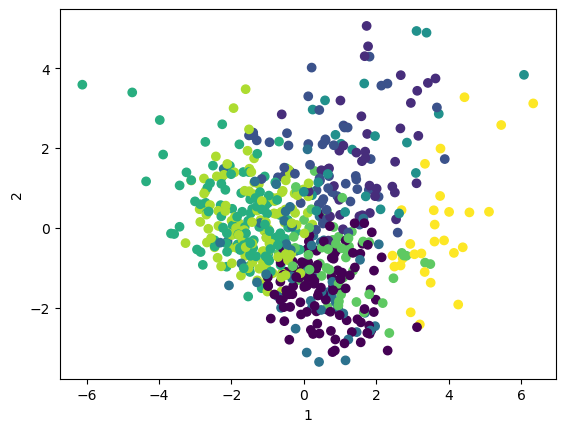

In [38]:
show_clusters(df_pca)

In [39]:
df_pca

,1,2,3,4,5,6,7,8,9,10,11,class
0,0.782270,0.899383,-2.697392,0.533307,-3.138869,-1.514275,2.665827,-0.685834,1.259007,0.256176,1.837348,2
1,-0.618300,-1.586214,-0.635506,-0.310405,0.562274,0.589375,0.675577,0.329263,-0.816743,0.683726,-0.386646,7
2,-0.986590,-0.653197,1.410335,0.671055,-0.100877,0.014845,-0.535527,0.124015,0.826729,-0.091503,0.370604,5
3,0.351714,0.943830,-2.517241,-1.389667,-2.240394,0.125941,0.395271,-1.507727,1.722338,0.097634,-0.416667,2
4,-0.401488,-2.792502,0.639103,0.680018,0.235568,-0.868260,0.320928,-1.447538,-0.335757,-0.383506,0.317567,0
...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.001405,0.907642,-2.346239,1.062685,2.246584,-0.473569,-0.800659,0.711374,0.809448,-0.921241,0.264993,4
614,-0.646011,-1.797854,-0.397228,0.149875,0.326612,0.521456,0.377034,0.183911,-0.943828,0.891717,-0.006020,0
615,-0.913375,-2.262451,0.699241,-0.267697,0.334606,0.713550,0.702710,-0.357955,-1.385478,0.818801,0.197022,0
616,-1.161025,0.466183,0.336590,0.620981,-0.279144,-0.516132,0.001183,0.536952,1.530951,0.018101,-1.091853,5


When viewing this plot, if there were only 2 clusters it wouldn't offer the best conclusions. It seems best to have more than 2 clusters to actually be able to distinguish differences. Thus, we can see if there are patterns or significance.